<a href="https://colab.research.google.com/github/tbuzze/geohash/blob/master/geohash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Geohash

The sign forbids a geohasher to trespass and reach the location set by the algorithm. His expedition has to end there.
Geohashing divides the earth into a grid made up of graticules which are one degree wide in latitude and longitude. Inside these graticules, a random location is set. Geohashers then have the opportunity to go at the chosen location, either inside their own graticule or in a nearby one. If the location is inaccessible or in a private area, geohashers are advised not to try to reach it, although obviously inaccessible locations have been reached several times. In addition to the repeating location in each graticule, each day there is a single global hashpoint, much more challenging to reach.

Link: https://en.wikipedia.org/wiki/Geohashing

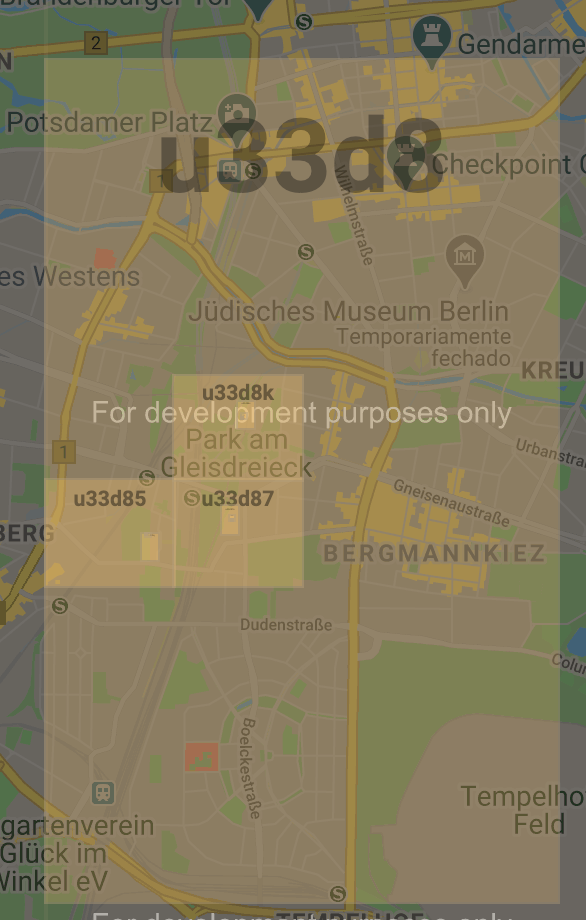

In [0]:
#-- importando um exemplo de geohash
from IPython.display import Image
Image('/content/drive/My Drive/Colab Notebooks/Geohash/img/geohash.png')

In [0]:
#-- carregando as libs
import geopandas as gpd
import pandas as pd
import geohash as g
import simplekml
import numpy as np

In [0]:
#-- setando o caminho do arquivo na rede
fp = '/content/drive/My Drive/Colab Notebooks/Geohash/Estrada/estrada.shp'

In [0]:
#-- abrindo o arquivo com o geopandas
data = gpd.read_file(fp)  

In [0]:
#-- verificando a cartografia do arquivo
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Observar a cartografia é muito importante, pois cada uma delas leva a uma distorção diferente da Terra. Afinal, a Terra não é **quadrada**, então ao tentar colocar em um plano 2D uma esfera, teremos uma distorções nas distâncias.

In [0]:
#-- printando o head do db
data.head(10)

,begin,end,geometry
0,-23.62733,-23.419511,POINT (-46.82951 -23.62733)
1,-23.62733,-23.419511,POINT (-46.82949 -23.62724)
2,-23.62733,-23.419511,POINT (-46.82946 -23.62716)
3,-23.62733,-23.419511,POINT (-46.82944 -23.62707)
4,-23.62733,-23.419511,POINT (-46.82942 -23.62698)
5,-23.62733,-23.419511,POINT (-46.82940 -23.62689)
6,-23.62733,-23.419511,POINT (-46.82938 -23.62681)
7,-23.62733,-23.419511,POINT (-46.82935 -23.62672)
8,-23.62733,-23.419511,POINT (-46.82933 -23.62663)
9,-23.62733,-23.419511,POINT (-46.82931 -23.62654)


O arquivo carregado é do tipo shp, ou seja, uma sequência de latitude e e longitude

In [0]:
#-- importando o mapa mundi
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [0]:
#-- selecionando o mapa do Brasil
br = world[world['name'] == 'Brazil']

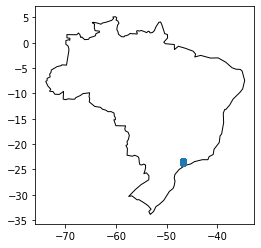

In [0]:
#-- plotando os dados no mapa do Brasil
base = br.plot(color='white', edgecolor='black')
_ = data.plot(ax=base)

In [0]:
#-- extraindo a latitude e longitude do arquivo
data['Lat'] = data.iloc[:].geometry.centroid.y
data['Long'] = data.iloc[:].geometry.centroid.x

In [0]:
#-- pritando o heado do novo db
data.head(10)

,begin,end,geometry,Lat,Long
0,-23.62733,-23.419511,POINT (-46.82951 -23.62733),-23.627330,-46.829509
1,-23.62733,-23.419511,POINT (-46.82949 -23.62724),-23.627243,-46.829487
2,-23.62733,-23.419511,POINT (-46.82946 -23.62716),-23.627156,-46.829465
3,-23.62733,-23.419511,POINT (-46.82944 -23.62707),-23.627068,-46.829443
4,-23.62733,-23.419511,POINT (-46.82942 -23.62698),-23.626981,-46.829421
5,-23.62733,-23.419511,POINT (-46.82940 -23.62689),-23.626894,-46.829398
6,-23.62733,-23.419511,POINT (-46.82938 -23.62681),-23.626807,-46.829376
7,-23.62733,-23.419511,POINT (-46.82935 -23.62672),-23.626719,-46.829354
8,-23.62733,-23.419511,POINT (-46.82933 -23.62663),-23.626632,-46.829332
9,-23.62733,-23.419511,POINT (-46.82931 -23.62654),-23.626545,-46.829310


In [0]:
#-- convertendo os dados para uma dataframe pandas
df = pd.DataFrame(data)
df.head(10)

,begin,end,geometry,Lat,Long
0,-23.62733,-23.419511,POINT (-46.82951 -23.62733),-23.627330,-46.829509
1,-23.62733,-23.419511,POINT (-46.82949 -23.62724),-23.627243,-46.829487
2,-23.62733,-23.419511,POINT (-46.82946 -23.62716),-23.627156,-46.829465
3,-23.62733,-23.419511,POINT (-46.82944 -23.62707),-23.627068,-46.829443
4,-23.62733,-23.419511,POINT (-46.82942 -23.62698),-23.626981,-46.829421
5,-23.62733,-23.419511,POINT (-46.82940 -23.62689),-23.626894,-46.829398
6,-23.62733,-23.419511,POINT (-46.82938 -23.62681),-23.626807,-46.829376
7,-23.62733,-23.419511,POINT (-46.82935 -23.62672),-23.626719,-46.829354
8,-23.62733,-23.419511,POINT (-46.82933 -23.62663),-23.626632,-46.829332
9,-23.62733,-23.419511,POINT (-46.82931 -23.62654),-23.626545,-46.829310


In [0]:
#-- criando o geohash da lat e long dos dados
df.loc[:, 'geohash'] = [g.encode(x[0], x[1], precision=7) for x in df.loc[:,['Lat', 'Long']].values]

In [0]:
#-- verificando a crianção do geaohash
df.head()

,begin,end,geometry,Lat,Long,geohash
0,-23.62733,-23.419511,POINT (-46.82951 -23.62733),-23.627330,-46.829509,6gy9w6g
1,-23.62733,-23.419511,POINT (-46.82949 -23.62724),-23.627243,-46.829487,6gy9w6g
2,-23.62733,-23.419511,POINT (-46.82946 -23.62716),-23.627156,-46.829465,6gy9w6g
3,-23.62733,-23.419511,POINT (-46.82944 -23.62707),-23.627068,-46.829443,6gy9w6g
4,-23.62733,-23.419511,POINT (-46.82942 -23.62698),-23.626981,-46.829421,6gy9w6g


In [0]:
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])

KeyError: 'Latitude'

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836 entries, 0 to 2835
Data columns (total 6 columns):
begin       2836 non-null float64
end         2836 non-null float64
geometry    2836 non-null object
Lat1        2836 non-null float64
Long2       2836 non-null float64
geohash     2836 non-null object
dtypes: float64(4), object(2)
memory usage: 133.0+ KB


In [0]:
df.isnull().sum()

begin       0
end         0
geometry    0
Lat1        0
Long2       0
geohash     0
dtype: int64

In [0]:
for i in range(len(df)):
    df.loc[i,'geohash1'] = g.neighbors(g.encode(df.iloc[i,3], df.iloc[i,4], precision=7))[0]
    df.loc[i,'geohash2'] = g.neighbors(g.encode(df.iloc[i,3], df.iloc[i,4], precision=7))[1]
    df.loc[i,'geohash3'] = g.neighbors(g.encode(df.iloc[i,3], df.iloc[i,4], precision=7))[2]
    df.loc[i,'geohash4'] = g.neighbors(g.encode(df.iloc[i,3], df.iloc[i,4], precision=7))[3]
    df.loc[i,'geohash5'] = g.neighbors(g.encode(df.iloc[i,3], df.iloc[i,4], precision=7))[4]
    df.loc[i,'geohash6'] = g.neighbors(g.encode(df.iloc[i,3], df.iloc[i,4], precision=7))[5]
    df.loc[i,'geohash7'] = g.neighbors(g.encode(df.iloc[i,3], df.iloc[i,4], precision=7))[6]
    df.loc[i,'geohash8'] = g.neighbors(g.encode(df.iloc[i,3], df.iloc[i,4], precision=7))[7]

In [0]:
df.head(10)

,begin,end,geometry,Lat1,Long2,geohash,geohash1,geohash2,geohash3,geohash4,geohash5,geohash6,geohash7,geohash8
0,-23.62733,-23.419511,POINT (-46.8295091 -23.6273301),-23.627330,-46.829509,6gy9w6g,6gy9w6f,6gy9w6u,6gy9w6e,6gy9w6d,6gy9w6s,6gy9w75,6gy9w74,6gy9w7h
1,-23.62733,-23.419511,POINT (-46.82948697240958 -23.62724286256685),-23.627243,-46.829487,6gy9w6g,6gy9w6f,6gy9w6u,6gy9w6e,6gy9w6d,6gy9w6s,6gy9w75,6gy9w74,6gy9w7h
2,-23.62733,-23.419511,POINT (-46.82946484481915 -23.62715562513371),-23.627156,-46.829465,6gy9w6g,6gy9w6f,6gy9w6u,6gy9w6e,6gy9w6d,6gy9w6s,6gy9w75,6gy9w74,6gy9w7h
3,-23.62733,-23.419511,POINT (-46.82944271722872 -23.62706838770056),-23.627068,-46.829443,6gy9w6g,6gy9w6f,6gy9w6u,6gy9w6e,6gy9w6d,6gy9w6s,6gy9w75,6gy9w74,6gy9w7h
4,-23.62733,-23.419511,POINT (-46.8294205896383 -23.62698115026742),-23.626981,-46.829421,6gy9w6g,6gy9w6f,6gy9w6u,6gy9w6e,6gy9w6d,6gy9w6s,6gy9w75,6gy9w74,6gy9w7h
5,-23.62733,-23.419511,POINT (-46.82939846204787 -23.62689391283427),-23.626894,-46.829398,6gy9w6g,6gy9w6f,6gy9w6u,6gy9w6e,6gy9w6d,6gy9w6s,6gy9w75,6gy9w74,6gy9w7h
6,-23.62733,-23.419511,POINT (-46.82937633445744 -23.62680667540112),-23.626807,-46.829376,6gy9w6g,6gy9w6f,6gy9w6u,6gy9w6e,6gy9w6d,6gy9w6s,6gy9w75,6gy9w74,6gy9w7h
7,-23.62733,-23.419511,POINT (-46.82935420686702 -23.62671943796798),-23.626719,-46.829354,6gy9w6g,6gy9w6f,6gy9w6u,6gy9w6e,6gy9w6d,6gy9w6s,6gy9w75,6gy9w74,6gy9w7h
8,-23.62733,-23.419511,POINT (-46.82933207927659 -23.62663220053483),-23.626632,-46.829332,6gy9w6g,6gy9w6f,6gy9w6u,6gy9w6e,6gy9w6d,6gy9w6s,6gy9w75,6gy9w74,6gy9w7h
9,-23.62733,-23.419511,POINT (-46.82930995168616 -23.62654496310169),-23.626545,-46.829310,6gy9w6g,6gy9w6f,6gy9w6u,6gy9w6e,6gy9w6d,6gy9w6s,6gy9w75,6gy9w74,6gy9w7h


In [0]:
df_append = df.loc[:, 'geohash']

In [0]:
df_append.shape

(41151,)

In [0]:
for i in range(1, 9):
    df_append = df_append.append(df['geohash'+str(i)])

KeyError: 'geohash1'

In [0]:
df_append.shape

(370359,)

In [0]:
df_append = pd.DataFrame(df_append)
df_append.head()

,0
0,6gzs3pt
1,6gzs3pt
2,6gzs3pm
3,6gzs3pm
4,6gzs3pk


In [0]:
df_append_nocupli = df_append.drop_duplicates([0])

In [0]:
df_append_nocupli.shape

(5014, 1)

# Gerando o KML

In [0]:
df.head()

,begin,end,geometry,Lat1,Long2,geohash,geohash1,geohash2,geohash3,geohash4,geohash5,geohash6,geohash7,geohash8
0,-23.62733,-23.419511,POINT (-46.8295091 -23.6273301),-23.627330,-46.829509,6gy9w6g,6gy9w6f,6gy9w6u,6gy9w6e,6gy9w6d,6gy9w6s,6gy9w75,6gy9w74,6gy9w7h
1,-23.62733,-23.419511,POINT (-46.82948697240958 -23.62724286256685),-23.627243,-46.829487,6gy9w6g,6gy9w6f,6gy9w6u,6gy9w6e,6gy9w6d,6gy9w6s,6gy9w75,6gy9w74,6gy9w7h
2,-23.62733,-23.419511,POINT (-46.82946484481915 -23.62715562513371),-23.627156,-46.829465,6gy9w6g,6gy9w6f,6gy9w6u,6gy9w6e,6gy9w6d,6gy9w6s,6gy9w75,6gy9w74,6gy9w7h
3,-23.62733,-23.419511,POINT (-46.82944271722872 -23.62706838770056),-23.627068,-46.829443,6gy9w6g,6gy9w6f,6gy9w6u,6gy9w6e,6gy9w6d,6gy9w6s,6gy9w75,6gy9w74,6gy9w7h
4,-23.62733,-23.419511,POINT (-46.8294205896383 -23.62698115026742),-23.626981,-46.829421,6gy9w6g,6gy9w6f,6gy9w6u,6gy9w6e,6gy9w6d,6gy9w6s,6gy9w75,6gy9w74,6gy9w7h


In [0]:
geo = {}
for i in range(len(df)):
    geo[i] = g.bbox(df.iloc[i,9])

In [0]:
db_geo = pd.DataFrame.from_dict(geo).T
db_geo.head()

,e,n,s,w
0,-46.830597,-23.627472,-23.628845,-46.83197
1,-46.830597,-23.627472,-23.628845,-46.83197
2,-46.830597,-23.627472,-23.628845,-46.83197
3,-46.830597,-23.627472,-23.628845,-46.83197
4,-46.830597,-23.627472,-23.628845,-46.83197


In [0]:
kml = simplekml.Kml()
for i in range(len(db_geo)):
    pol = kml.newpolygon(name=str(df.iloc[i, 4]))
    pol.outerboundaryis = [tuple(db_geo.loc[i, ['w','n']]), tuple(db_geo.loc[i, ['e','n']]), tuple(db_geo.loc[i, ['e','s']]), tuple(db_geo.loc[i, ['w','s']])]
    pol.style.polystyle.color = '#99ff0000'
    pol.style.polystyle.outline = 1
    pol.description=('Samples: ' + str(df.iloc[i, 0]))